# Boosting Methods on Imabalnced Dataset

### Benefits of using Boosting algorithms for Imbalanced Dataset<br>
- **Focus on Hard Samples**: Boosting assigns higher weights to misclassified samples, often those from the minority class, ensuring they are prioritized in subsequent iterations.
- **Class-Balanced Learning**: Algorithms like XGBoost support custom loss functions or class weights, enabling tailored optimization for imbalanced data.
- **Improved Model Accuracy**: By iteratively improving weak learners, boosting reduces bias and achieves higher accuracy across all classes.

### Implemented Boosting Algorithms:
1. AdaBoost
2. XGBoost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import joblib

In [3]:
X_train = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CleanedDataset/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CleanedDataset/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CleanedDataset/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CleanedDataset/y_test.csv')

## AdaBoost
AdaBoost (Adaptive Boosting) is a sequential ensemble learning algorithm that combines multiple weak learners (typically decision stumps) to create a strong classifier. It works by assigning higher weights to misclassified samples, forcing subsequent classifiers to focus on them. AdaBoost improves performance by iteratively adjusting sample weights, with each new model contributing a weighted vote toward the final prediction.

In [3]:
estimator = DecisionTreeClassifier(max_depth=1,
                                   random_state=42)

adaboost_model = AdaBoostClassifier(estimator=estimator,
                                    n_estimators=50,
                                    learning_rate=0.001)

In [4]:
adaboost_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.001)

In [5]:
y_pred = adaboost_model.predict(X_test)
y_pred_proba = adaboost_model.predict_proba(X_test)

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2902
           1       0.00      0.00      0.00         1
           2       0.65      0.45      0.53        29
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        14

    accuracy                           0.97      3000
   macro avg       0.23      0.21      0.22      3000
weighted avg       0.95      0.97      0.96      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


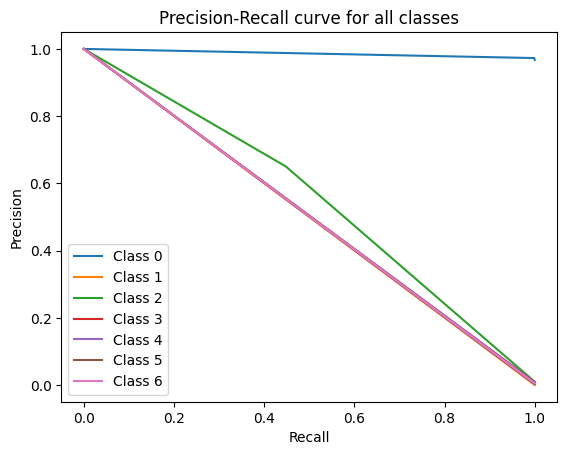

In [7]:
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for all classes')
plt.legend(loc='best')
plt.show()

In [8]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5,6])

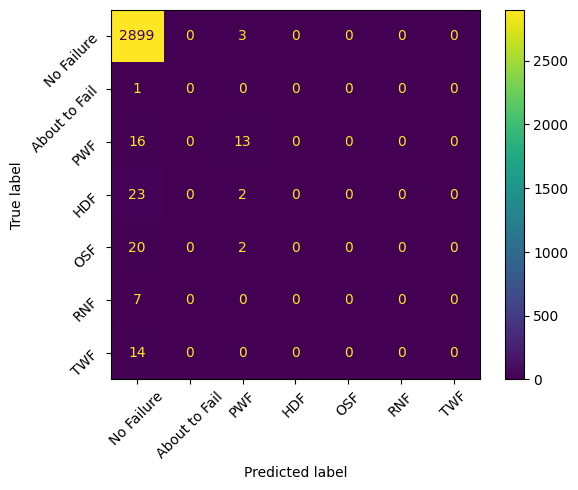

In [9]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'About to Fail', 'PWF', 'HDF', 'OSF', 'RNF', 'TWF'])
disp.plot()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [10]:
joblib.dump(adaboost_model, "/content/drive/MyDrive/PredictiveMaintenance/Models/adaboost_on_imbalanced_data.pkl")

['/content/drive/MyDrive/PredictiveMaintenance/Models/adaboost_on_imbalanced_data.pkl']

## XGBoost
XGBoost (Extreme Gradient Boosting) is a powerful, efficient ensemble learning algorithm for regression, classification, and ranking tasks. It uses gradient boosting framework to optimize model performance, supports parallel processing, handles missing values, and includes regularization to prevent overfitting, making it popular for structured/tabular data tasks.

In [1]:
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [4]:
X_train.columns = [
    "Type",
    "AirTemperature",
    "ProcessTemperature",
    "RotationalSpeed",
    "Torque",
    "ToolWear"
]
X_test.columns = X_train.columns

In [5]:
xgboost_model = XGBClassifier(
    n_estimators = 100,
    objective='multi:softmax',
    num_class=7,
    eval_metric='mlogloss',
)

In [6]:
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=7, num_parallel_tree=None, ...)

In [7]:
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=7, num_parallel_tree=None, ...)

In [8]:
y_pred = xgboost_model.predict(X_test)
y_pred_proba = xgboost_model.predict_proba(X_test)

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2902
           1       1.00      1.00      1.00         1
           2       0.87      0.69      0.77        29
           3       1.00      0.92      0.96        25
           4       0.80      0.73      0.76        22
           5       0.00      0.00      0.00         7
           6       0.17      0.07      0.10        14

    accuracy                           0.99      3000
   macro avg       0.69      0.63      0.65      3000
weighted avg       0.98      0.99      0.98      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


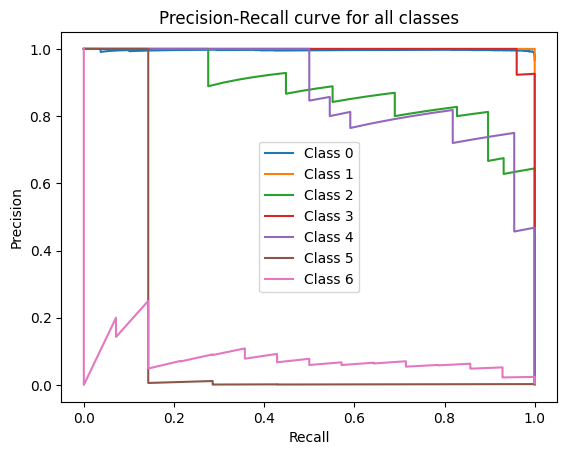

In [10]:
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for all classes')
plt.legend(loc='best')
plt.show()

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5,6])

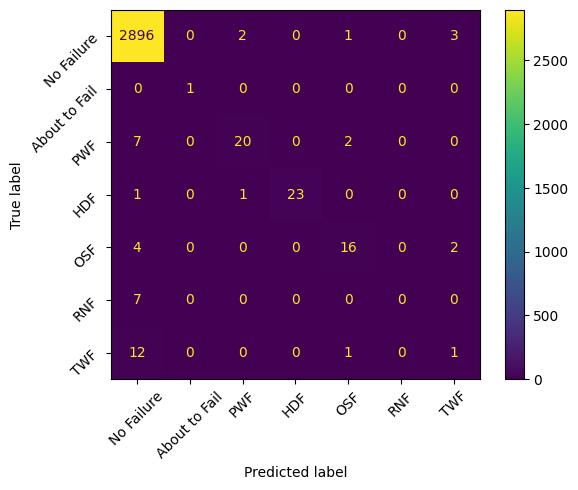

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'About to Fail', 'PWF', 'HDF', 'OSF', 'RNF', 'TWF'])
disp.plot()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [13]:
joblib.dump(xgboost_model, "/content/drive/MyDrive/PredictiveMaintenance/Models/xgboost_on_imbalanced_data.pkl")

['/content/drive/MyDrive/PredictiveMaintenance/Models/xgboost_on_imbalanced_data.pkl']